**Black Friday Dataset EDA and Feature Engineering**


Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Cleaning and preparing the data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_train.shape

(361391, 12)

In [7]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361391 entries, 0 to 361390
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     361391 non-null  int64  
 1   Product_ID                  361391 non-null  object 
 2   Gender                      361391 non-null  object 
 3   Age                         361391 non-null  object 
 4   Occupation                  361391 non-null  int64  
 5   City_Category               361391 non-null  object 
 6   Stay_In_Current_City_Years  361391 non-null  object 
 7   Marital_Status              361391 non-null  int64  
 8   Product_Category_1          361391 non-null  int64  
 9   Product_Category_2          249424 non-null  float64
 10  Product_Category_3          110750 non-null  float64
 11  Purchase                    361391 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 33.1+ MB


In [9]:
df_train.isnull().sum()

#Only product category 2 and product category 3 has null values

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,111967


In [10]:
df_train.shape
#df_test.shape

(361391, 12)

In [11]:
#Combine the train and test dataset so that all prerocessing would be done together (esp. in Kaggle competitions)

df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

In [12]:
df.shape

(565549, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565549 entries, 0 to 565548
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     565549 non-null  int64  
 1   Product_ID                  565549 non-null  object 
 2   Gender                      565548 non-null  object 
 3   Age                         565548 non-null  object 
 4   Occupation                  565548 non-null  float64
 5   City_Category               565548 non-null  object 
 6   Stay_In_Current_City_Years  565548 non-null  object 
 7   Marital_Status              565548 non-null  float64
 8   Product_Category_1          565548 non-null  float64
 9   Product_Category_2          390372 non-null  float64
 10  Product_Category_3          172826 non-null  float64
 11  Purchase                    361391 non-null  float64
 12  source                      565549 non-null  object 
dtypes: float64(6),

In [14]:
df.drop(['User_ID'], axis=1, inplace=True)

In [15]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,565548.000000,565548.000000,565548.000000,390372.000000,172826.000000,361391.000000
mean,8.077145,0.410248,5.289118,9.848286,12.661718,9325.319510
std,6.525610,0.491879,3.742888,5.090742,4.126036,4976.986649
min,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12066.000000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


Data preprocessing


In [16]:
# Categorical Features into numerical

df['Gender']=df['Gender'].map({'F':0, 'M':1})

#df['Gender'] = pd.get_dummies(df, columns=['Gender'])
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,P00069042,0.0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,train
1,P00248942,0.0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,train
2,P00087842,0.0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,train
3,P00085442,0.0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,train
4,P00285442,1.0,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
565544,P00275842,0.0,36-45,5.0,A,4+,0.0,2.0,9.0,15.0,NaN,test
565545,P00084342,0.0,36-45,5.0,A,4+,0.0,13.0,16.0,NaN,NaN,test
565546,P00152942,0.0,36-45,5.0,A,4+,0.0,5.0,NaN,NaN,NaN,test
565547,P00035142,0.0,36-45,5.0,A,4+,0.0,1.0,5.0,NaN,NaN,test


In [17]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [18]:
#pd.get_dummies(df['Age'],drop_first=True)

df['Age']=df['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7 }) #Target / ordinal encoding

#Also, label encoding -- Preprocessing. LabelEncoder()


In [19]:
df_city= pd.get_dummies(df['City_Category'],drop_first=True)



In [20]:
df = pd.concat([df,df_city],axis=1)


In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,B,C
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,train,False,False
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,train,False,False
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,train,False,False
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,train,False,False
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,train,False,True


In [22]:
df.drop(['City_Category'], axis=1, inplace=True)

In [23]:
#Missing Values

df.isnull().sum()


,0
Product_ID,0
Gender,1
Age,1
Occupation,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,175177
Product_Category_3,392723
Purchase,204158


In [24]:
df['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [25]:
df['Product_Category_2'].unique()

#Discrete feature


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [26]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,66066
14.0,57346
2.0,51127
16.0,44839
15.0,39303
5.0,27030
4.0,26730
6.0,17156
11.0,14648


In [27]:
df['Product_Category_2'].mode()

,Product_Category_2
0,8.0


In [28]:
df['Product_Category_2'].isnull().sum()

175177

In [29]:
# We cannot just drop 'Product_Category_2' as around 5 lakh records would be destroyed.
# Fill missing values in 'Product_Category_2' with its mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [30]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:

# Fill missing values in 'Product_Category_3' with its mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,train,False,False
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,train,False,False
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,train,False,False
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,train,False,False
4,P00285442,1.0,7.0,16.0,4+,0.0,8.0,8.0,16.0,7969.0,train,False,True


In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [34]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,199288
2,104792
3,97737
4+,87262
0,76469


In [35]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [37]:
df['Stay_In_Current_City_Years'].dtype

dtype('O')

In [39]:
# Replace NaN values in 'Stay_In_Current_City_Years' with 0 before converting to integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].fillna(0)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [38]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

ValueError: cannot convert float NaN to integer

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565549 entries, 0 to 565548
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  565549 non-null  object 
 1   Gender                      565548 non-null  float64
 2   Age                         565548 non-null  float64
 3   Occupation                  565548 non-null  float64
 4   Stay_In_Current_City_Years  565549 non-null  int64  
 5   Marital_Status              565548 non-null  float64
 6   Product_Category_1          565548 non-null  float64
 7   Product_Category_2          565549 non-null  float64
 8   Product_Category_3          565549 non-null  float64
 9   Purchase                    361391 non-null  float64
 10  source                      565549 non-null  object 
 11  B                           565549 non-null  bool   
 12  C                           565549 non-null  bool   
dtypes: bool(2), fl

In [41]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

<Axes: xlabel='Age', ylabel='Purchase'>

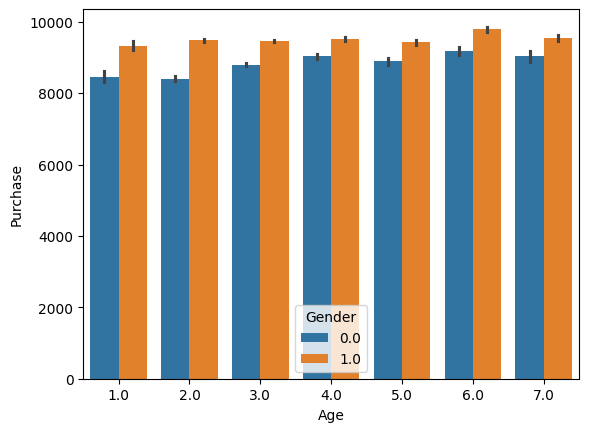

In [42]:
#Visualization of Age vs purchase
sns.barplot(x='Age',y='Purchase',hue ='Gender',data=df)

In [43]:
#Gender(1) Male are heavy spenders compared to female
#Purchasing by age category is similar

<Axes: xlabel='Occupation', ylabel='Purchase'>

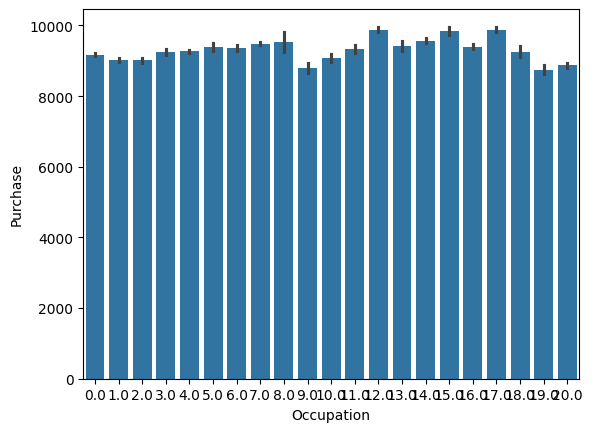

In [44]:
#Visualization of purchase with occupation

sns.barplot(x='Occupation',y='Purchase',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

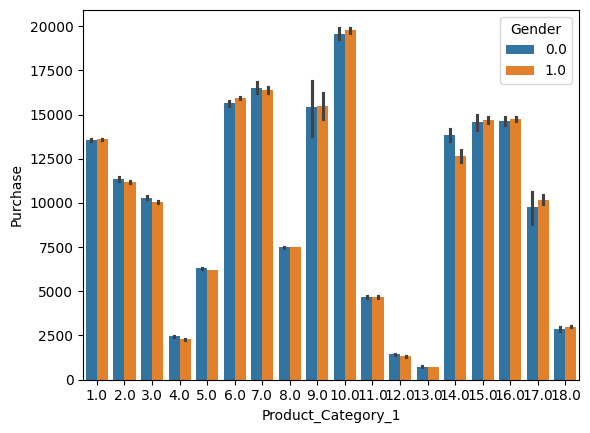

In [45]:
#Visualization

sns.barplot(x='Product_Category_1',y='Purchase',hue = 'Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

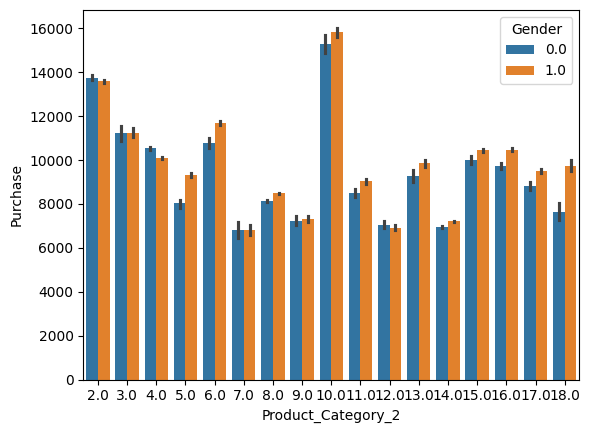

In [46]:
#Visualization

sns.barplot(x='Product_Category_2',y='Purchase',hue = 'Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

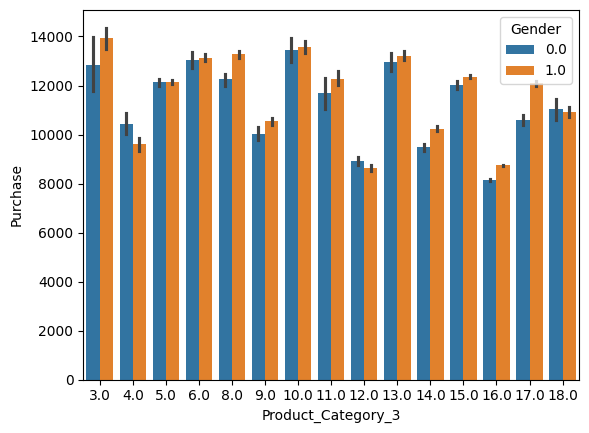

In [47]:
#Visualization

sns.barplot(x='Product_Category_3',y='Purchase',hue = 'Gender',data=df)

In [48]:
df.drop(['Product_ID'], axis=1, inplace=True)

In [51]:
df_test = df[df['source']=='test']
df_train = df[df['source']=='train']

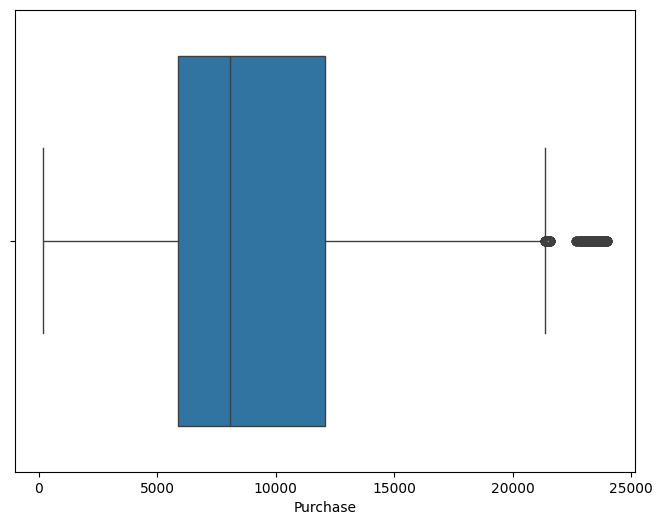

In [52]:
# prompt: boxplot of df['Purchase']

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase'])
plt.show()

In [53]:
X = df_train.drop(['source','Purchase'], axis=1)
y = df_train['Purchase']

In [55]:
y.head()

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
#Train the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [60]:
y_pred = regressor.predict(X_test)

In [61]:


from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")



Mean Squared Error: 21932049.07465363
R-squared: 0.11271778104658303


Mean Absolute Error: 3592.8694523502027
Root Mean Squared Error: 4683.166564906018
Explained Variance Score: 0.11271793184035162


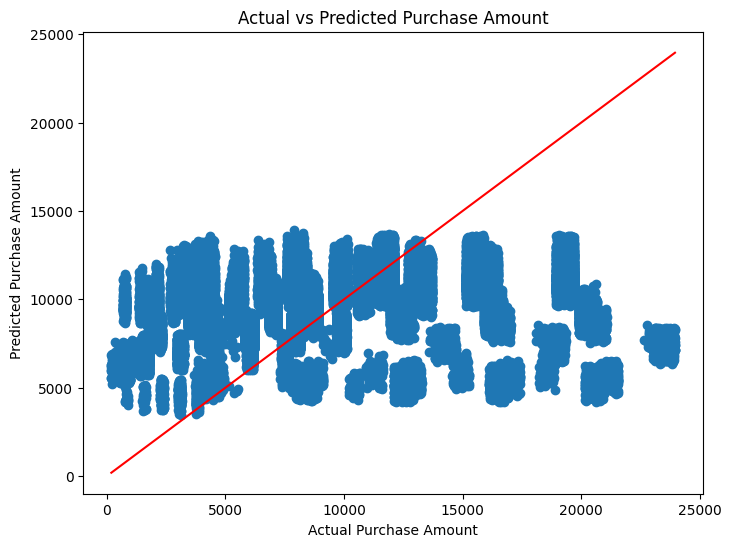

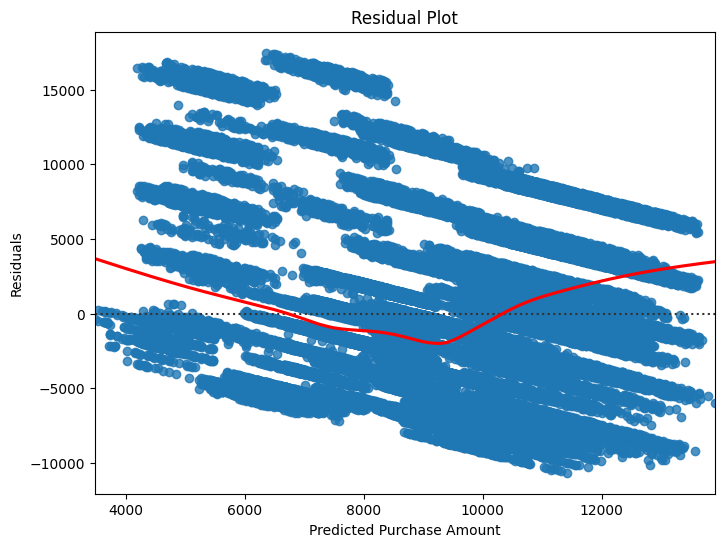

In [62]:


# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Calculate Explained Variance Score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")

# Visualize the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted Purchase Amount")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()